<a href="https://colab.research.google.com/github/AshishSinha5/mlAlgos/blob/master/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Random Forest is an ensembple of Decision Tree<br>
Randomly Choose n examples from training set (Bootstrapping)<br>
Grow the decision tree from the bootstrap sample<br>
Repeat k times(no. of Tree><br>
Classify using majority votes

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest  = RandomForestClassifier(criterion = 'gini',
                                 n_estimators = 25,
                                 random_state = 1,
                                 n_jobs =   2)

In [0]:
from sklearn import datasets
#loading iris dataset setting petal and sepal length as feature matrix and class label as targets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
#Splitting the dataset in test ans train dataset to test aor model's performance on unseen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 1, stratify = y)
#stratify function ensures all the classes have equal proportion of representaion in both test and train sets
# performing feature scaling for better preformance of the optimizer
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit method will estimate the parameters mean and standars deviation of the sample given
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max, resolution))
    #xx1, xx2 are the coordinates of x and y respectively, we pair each value of the two corresponding matrices and get a grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x =X[y==c1,0],
                    y = X[y==c1,1],
                    alpha =0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1, edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c= '', edgecolors='black',
                    alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

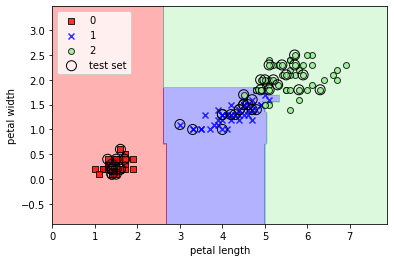

In [6]:
forest.fit(X_train,y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plotDecisionRegion(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.legend(loc = 'upper left')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

We trained random forest from 25 decision trees and used gini impurity method on how to split the node, n_jobs is used to parallelize the model training using multiple cores of the computer